In [9]:
from datasets import load_dataset
from transformers import AutoTokenizer
import pandas as pd

In [2]:
tokenizer = AutoTokenizer.from_pretrained("heegyu/kogpt-j-base")

Downloading:   0%|          | 0.00/790 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/925k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

In [7]:
# dataset = load_dataset("heegyu/nia_summary", use_auth_token=True)
dataset = load_dataset("json", data_files="output/*.jsonl")
dataset

Using custom data configuration default-ed8c32b9841a613f


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /Users/casa/.cache/huggingface/datasets/json/default-ed8c32b9841a613f/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'summary'],
        num_rows: 165071
    })
})

In [8]:
def encode_length(x):
    encodings = tokenizer.encode(x['text'], truncation=False)
    return {
        "encoded_length": len(encodings)
    }

encoded_dataset = dataset.map(encode_length)
encoded_dataset['train'][0]

  0%|          | 0/165071 [00:00<?, ?ex/s]

{'id': 'REPORT-literature-03971-03971',
 'text': ' 나는 그 모든 소리를 들을 때에 꽃다운 혜경의 장래에 대한 동정심과 아울 러 최 목사와 그 남자의 추행에 대한 의분과 질투에 끓었다. “혼례식은 언제 하나?” “이제 앞으로 한 달 반쯤 남았어요. 오월 열 이튿날이라니까……. 그래서 그 준비 때문에 졸업식 전에 먼저 나왔대요.” 나는 무어라고 형언할 수 없는 기분에 싸였다. 혜경이와 아무 관계도 없건 마는 그가 불원간 떠나게 된다는 것이 내게는 말할 수 없이 쓸쓸하였다. 어 째서 쓸쓸한지 나로도 알 수 없었다. ‘단념! 단념! 모든 것을 단념! 하자! 내가 왜 이럴까?’ 나는 그와 같은 아내를 가질 자격도 없거니와 더구나 그는 결혼한 여자 다……. 그러나 다만 누이로라도 사랑한다면. 나는 얼토당토않은 이런 생각 으로 밤잠을 못 이루었다. 이튿날부터 나는 혜경이를 자주 보게 되었다. 나는 그와 마주칠 때마다 부 드러운 느낌을 받으면서도 수줍고 부끄러워서 그의 낯을 똑똑히 바라보지 못하였다. 나뿐이 아니라 혜경이도 나를 똑바로 쳐다보지 않았다. 혹 내가 마당에서 거닐거나 무엇을 할 때에 그의 방문이 열렸거나 그가 마당에 나섰 거나 하면 나는 그를 등지고 돌아보지 않았다. 그리고 내 등뒤에 선 그가 무슨 발광체 같기도 하고 나의 일동일정을 감시나 하는 듯해서 보고 싶으면 서도 차마 머리를 돌리지 못하였다. 그러면서도 나는 눈이 삐뚤어지도록 은 근히 돌려서 애교가 흐르는 그의 얼굴을 도적해 보았다. 도적해 보다가 생 각하던 바에 뒤져서 그가 나를 주의해 보지 않는 것을 발견할 때면 나는 마 음이 좀 편하면서도 섭섭하였다. 혜경이도 어찌 되어 나를 등지고 내 앞에 서는 때면 그의 일동일정이 부자연스럽게 보였다. 그도 내 모양으로 머리를 돌려서 내 편을 못 보았다. 그러나 간간이 그의 머리가 극히 고요한 동작으 로 돌아지면서 하 얀 귀, 불그레한 뺨의 반면이 내 쪽으로 향할 듯하다가 도 그만 못 돌리는 것은 곁눈질하는 것임을 나는 

In [10]:
pd.Series(
    encoded_dataset['train']['encoded_length']
).describe()

count    165071.000000
mean        361.312999
std         105.791715
min          96.000000
25%         302.000000
50%         336.000000
75%         399.000000
max        1154.000000
dtype: float64

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


<AxesSubplot: ylabel='Frequency'>

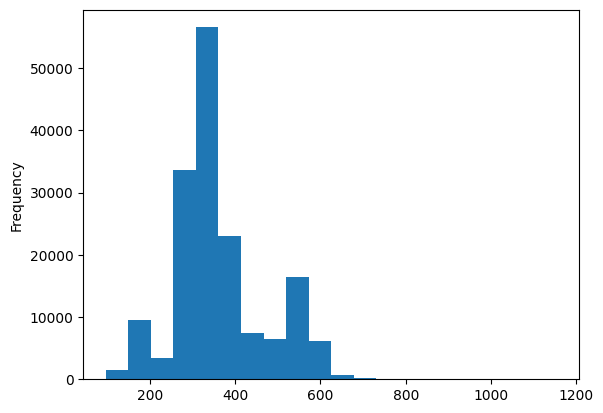

In [11]:
pd.Series(
    encoded_dataset['train']['encoded_length']
).plot.hist(bins=20)